<a href="https://colab.research.google.com/github/Farah-Deeba-UNCC/Introduction-to-ML/blob/main/Notebooks/9-LinearRegression(assignment1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
!git clone https://github.com/Farah-Deeba-UNCC/Introduction-to-ML.git

fatal: destination path 'Introduction-to-ML' already exists and is not an empty directory.


## Load data
 The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. The dataset is loaded from the data file into the variables X and Y:

In [77]:
df =pd.read_csv('Introduction-to-ML/Data/D3.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


## Initialization
 To take into account the intercept term , we add an additional first column to df and set it to all ones.

 In the following lines, we add another dimension to our data to accommodate the  intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01

In [78]:
#Lets create a matrix with a dimension of m by 1. m is the number of observations
m = df.X1.size
X_0 = np.ones((m, 1))
X_0 = pd.DataFrame(X_0)
df.insert(0, "X0",X_0)
display(df)

,X0,X1,X2,X3,Y
0,1.0,0.000000,3.440000,0.440000,4.387545
1,1.0,0.040404,0.134949,0.888485,2.679650
2,1.0,0.080808,0.829899,1.336970,2.968490
3,1.0,0.121212,1.524848,1.785455,3.254065
4,1.0,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...,...
95,1.0,3.838384,1.460202,3.046061,-4.440595
96,1.0,3.878788,2.155152,3.494545,-4.458663
97,1.0,3.919192,2.850101,3.943030,-4.479995
98,1.0,3.959596,3.545051,0.391515,-3.304593


Let's define a function, computeCost, that will compute the cost for a given set of $\theta$ values;

In [79]:
def computeCost(X,y,theta):
  """
  Compute cost for linear regression.
  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
  m= number of training examples
  n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  Output Parameters
  -----------------
  J : Scalar value.
  """
  m = len(X)
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J


Let's define a function, gradientDescent to implement the gradient descent algorithm and optimize the $\theta$ values.

In [80]:
def gradientDescent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension ( n x 1)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value.

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = computeCost(X, y, theta)
  return theta, cost_history

In [81]:
X = df.loc[:,['X0','X1','X2','X3']]
y = df.Y
theta = np.zeros(2)
iterations = 10000;
alpha = 0.1;

# calling our gradient_decsent function for X1
Xarray1 = X.loc[:,['X0','X1']].values
yarray = y.values
theta1, cost_history1 = gradientDescent(Xarray1, yarray, theta, alpha, iterations)
print('Final value of theta =', theta1)

# calling our gradient_decsent function for X2
Xarray2 = X.loc[:,['X0','X2']].values
theta2, cost_history2 = gradientDescent(Xarray2, yarray, theta, alpha, iterations)
print('Final value of theta =', theta2)

# calling our gradient_decsent function for X3
Xarray3 = X.loc[:,['X0','X3']].values
theta3, cost_history3 = gradientDescent(Xarray3, yarray, theta, alpha, iterations)
print('Final value of theta =', theta3)


Final value of theta = [ 5.92794892 -2.03833663]
Final value of theta = [0.73606043 0.55760761]
Final value of theta = [ 2.8714221  -0.52048288]


## 1.1 Report the linear model you found for each explanatory variable.

In [82]:
#linear model when explanatory variable is X1
print("y=",theta1[1],"x1 +",theta1[0])

#linear model for the second column
print("y=",theta2[1],"x2 +",theta2[0])

#linear model for the third column
print("y=",theta3[1],"x3 +",theta3[0])


y= -2.038336633650798 x1 + 5.927948918061593
y= 0.5576076103326044 x2 + 0.7360604300947905
y= -0.5204828843001038 x3 + 2.8714221039882015


## 1.2. Plot the regression model and loss over the iteration per each explanatory variable.

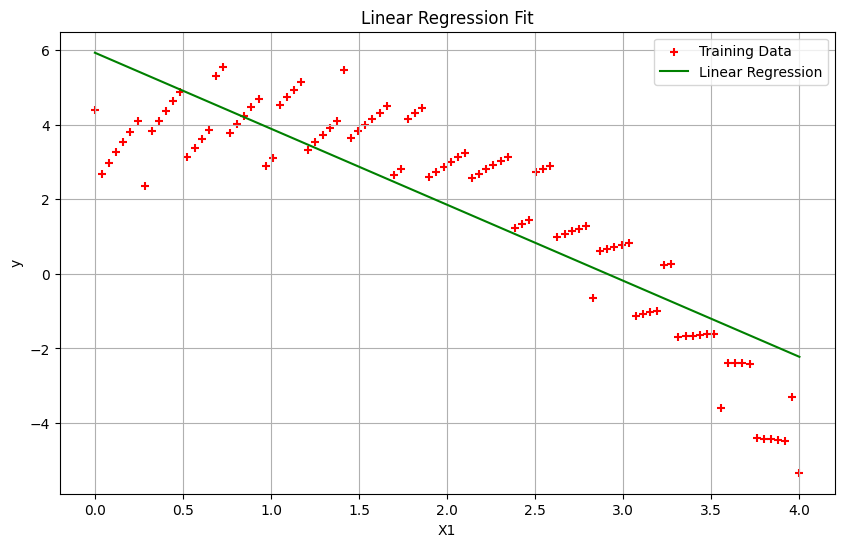

In [83]:
# plotting the final regression model for the first column
plt.scatter(X.X1, y, color='red', marker= '+', label= 'Training Data')
plt.plot(X.X1, Xarray1.dot(theta1), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

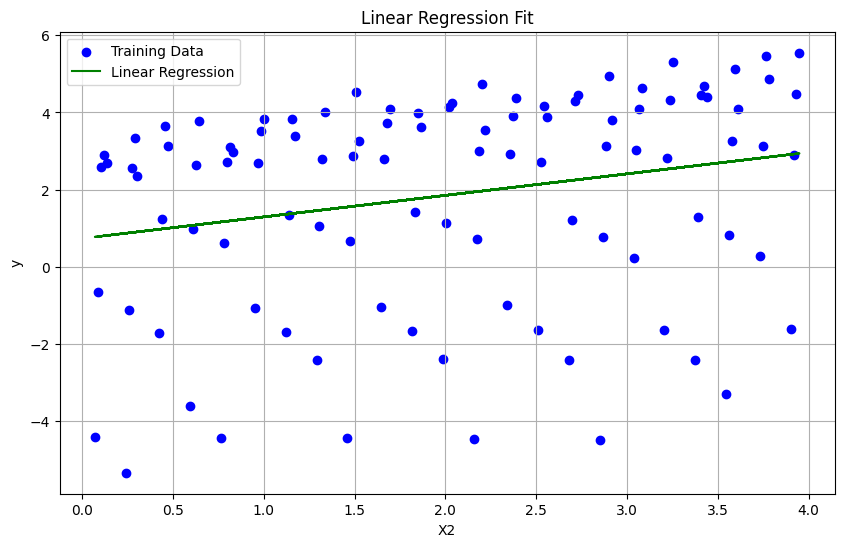

In [84]:
#plotting the final regression model for the second column
plt.scatter(X.X2, y, color='blue', marker= 'o', label= 'Training Data')
plt.plot(X.X2, Xarray2.dot(theta2), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X2')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

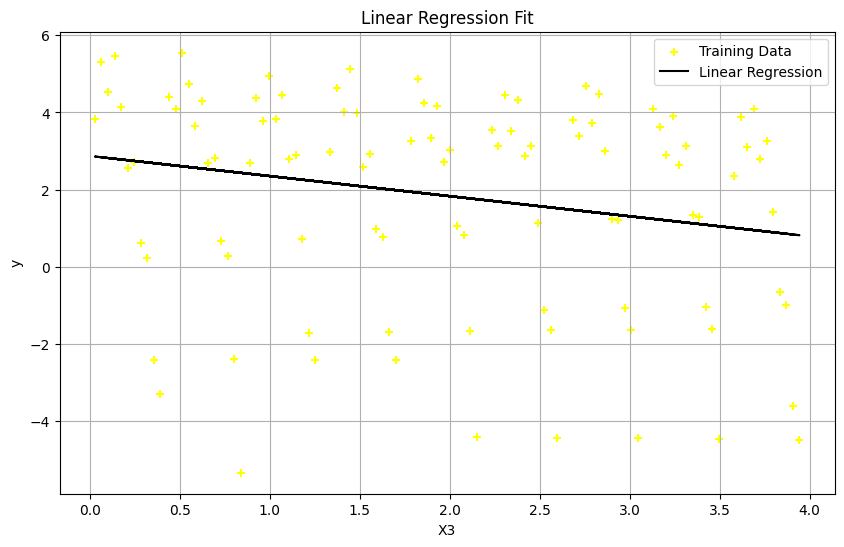

In [85]:
plt.scatter(X.X3, y, color='yellow', marker= '+', label= 'Training Data')
plt.plot(X.X3, Xarray3.dot(theta3), color='black', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X3')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Loss for X1')

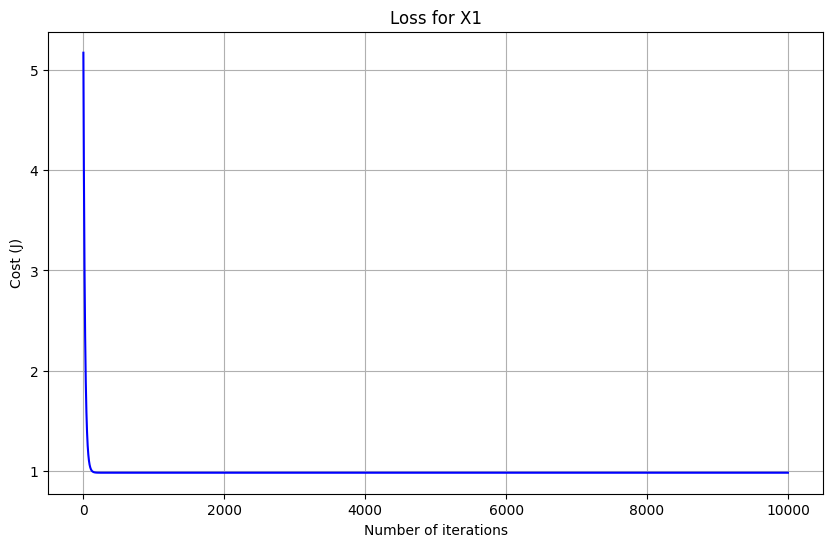

In [86]:
#plotting the loss over iteration graph for explanatory variable x1
plt.plot(range(1, iterations + 1),cost_history1, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss for X1')

Text(0.5, 1.0, 'Loss for X2')

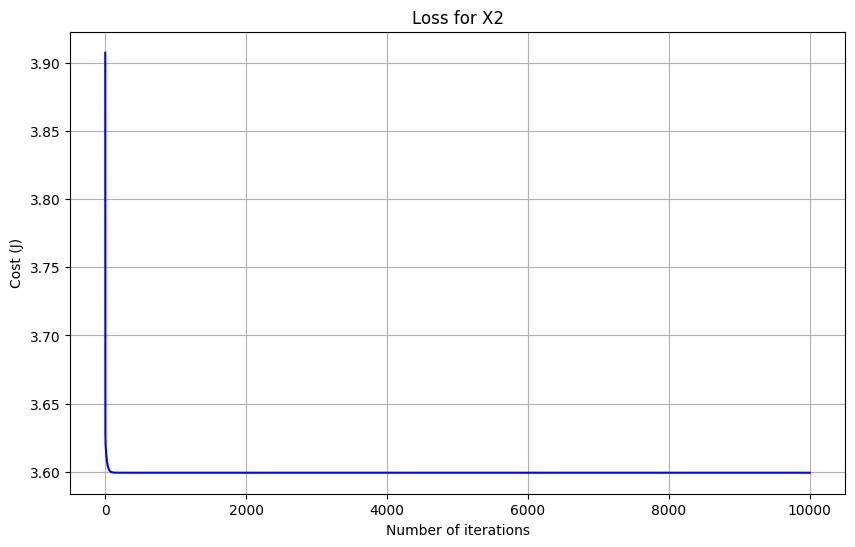

In [87]:
#plotting the loss over iteration graph for explanatory variable x2
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss for X2')

Text(0.5, 1.0, 'Loss for X3')

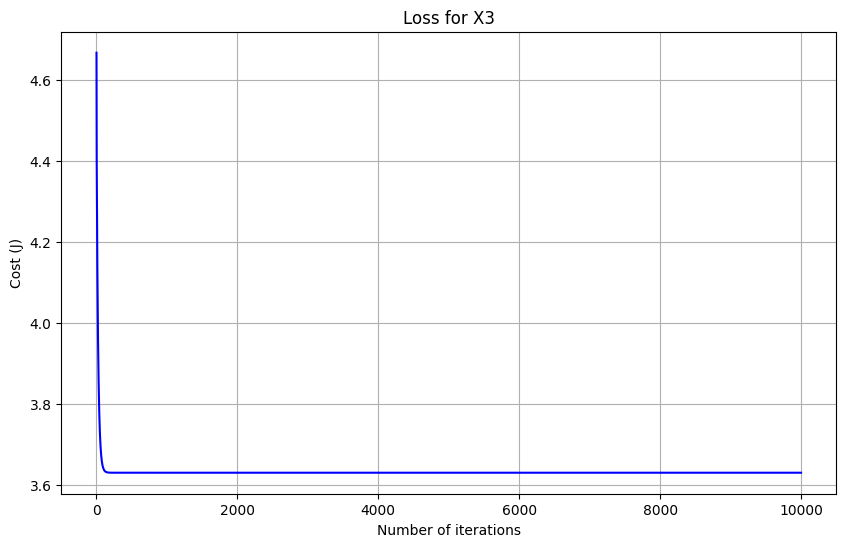

In [88]:
#plotting the loss over iteration graph for explanatory variable x3
plt.plot(range(1, iterations + 1),cost_history3, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss for X3')

## 1.3 lower loss (cost) for explanatory variables explaining the output (Y)


In [89]:
print("final loss for the first column:", cost_history1[-1])
print("final loss for the second column:", cost_history2[-1])
print("final loss for the third column:", cost_history3[-1])

final loss for the first column: 0.9849930825405946
final loss for the second column: 3.5993660181680425
final loss for the third column: 3.6294511246079155


The lowest cost was found when the explanatory variable is X1.

## 1.4 Impact of the different learning rates on the final loss and number of training iterations

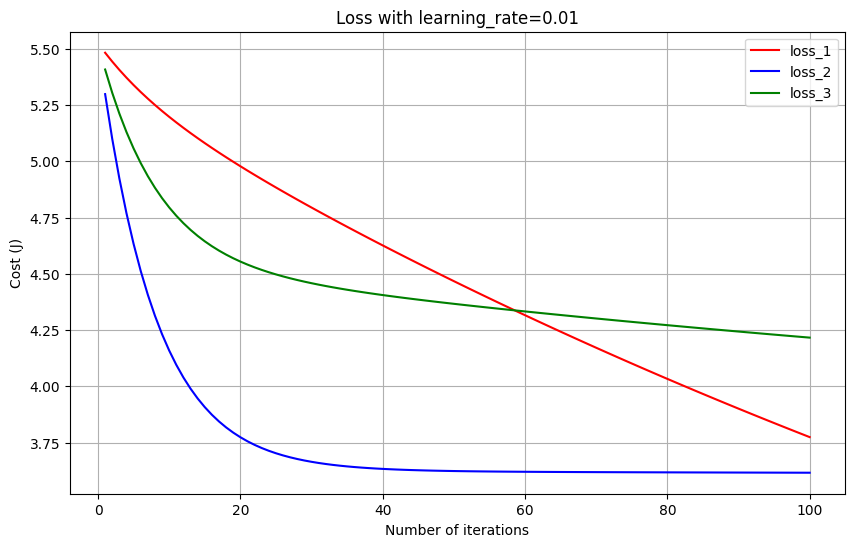

In [90]:
#testing for learning_rate = 0.01
iterations = 100
alpha = 0.01;
theta1, cost_history1 = gradientDescent(Xarray1, yarray, theta, alpha, iterations)
theta2, cost_history2 = gradientDescent(Xarray2, yarray, theta, alpha, iterations)
theta3, cost_history3 = gradientDescent(Xarray3, yarray, theta, alpha, iterations)
plt.plot(range(1, iterations + 1),cost_history1, color='red')
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.plot(range(1, iterations + 1),cost_history3, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss with learning_rate=0.01')
plt.legend(["loss_1", "loss_2", "loss_3"])

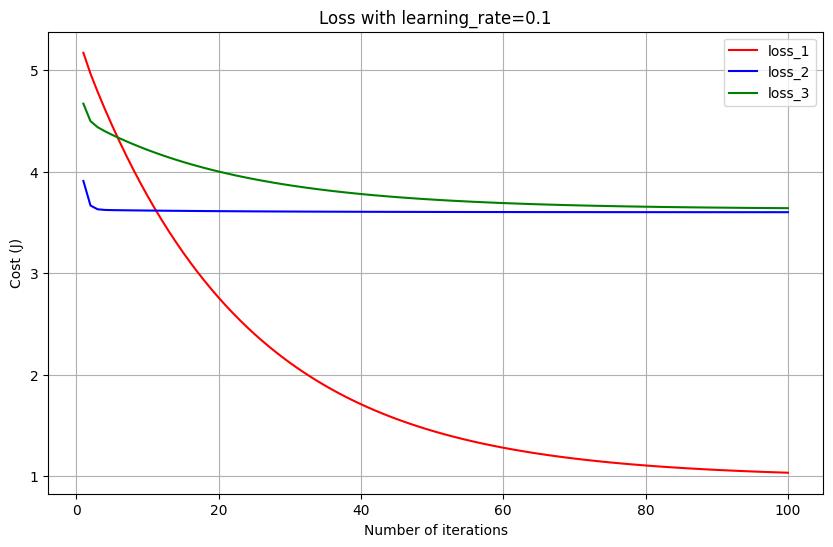

In [91]:
#testing for learning_rate = 0.1
iterations = 100
alpha = 0.1;
theta1, cost_history1 = gradientDescent(Xarray1, yarray, theta, alpha, iterations)
theta2, cost_history2 = gradientDescent(Xarray2, yarray, theta, alpha, iterations)
theta3, cost_history3 = gradientDescent(Xarray3, yarray, theta, alpha, iterations)
plt.plot(range(1, iterations + 1),cost_history1, color='red')
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.plot(range(1, iterations + 1),cost_history3, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss with learning_rate=0.1')
plt.legend(["loss_1", "loss_2", "loss_3"])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-79-210a2ae973b7>:18: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
<ipython-input-80-3d6749a58d40>:25: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta;


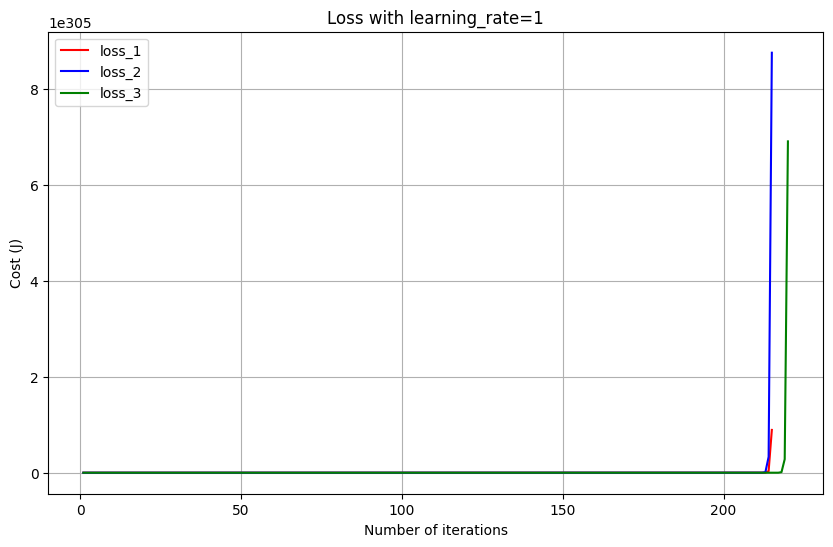

In [92]:
#testing for learning_rate = 1
alpha = 1;
iterations = 1000
theta1, cost_history1 = gradientDescent(Xarray1, yarray, theta, alpha, iterations)
theta2, cost_history2 = gradientDescent(Xarray2, yarray, theta, alpha, iterations)
theta3, cost_history3 = gradientDescent(Xarray3, yarray, theta, alpha, iterations)
plt.plot(range(1, iterations + 1),cost_history1, color='red')
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.plot(range(1, iterations + 1),cost_history3, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss with learning_rate=1')
plt.legend(["loss_1", "loss_2", "loss_3"])

As you can see, when we are using a higher learning rate, our loss functions decrease faster and thus we can reach a minimum loss in fewer iterations. However, keep in mind that if we use a very large learning rate, the loss might diverge due to overshooting and never reach the minimum.

## Question 2

In [93]:
X = df.loc[:,['X0','X1','X2','X3']]
y = df.Y
theta = np.zeros(4)
iterations = 1000;
alpha = 0.1;

# calling our gradient_decsent function for X1
Xarray = X.loc[:,['X0','X1','X2','X3']].values
yarray = y.values
thetaFinal, cost_history = gradientDescent(Xarray, yarray, theta, alpha, iterations)
print('Final value of theta =', thetaFinal)

#printing the final linear model
print(thetaFinal)
print ("y_bar = ", thetaFinal[0] , thetaFinal[1], "* x1 + " , thetaFinal[2], "* x2 + ",  thetaFinal[3], "* x3  ")


Final value of theta = [ 5.31393577 -2.00368658  0.53260157 -0.26556795]
[ 5.31393577 -2.00368658  0.53260157 -0.26556795]
y_bar =  5.313935769531635 -2.0036865792753904 * x1 +  0.5326015740310898 * x2 +  -0.2655679465553417 * x3  


Text(0.5, 1.0, 'Loss for X3')

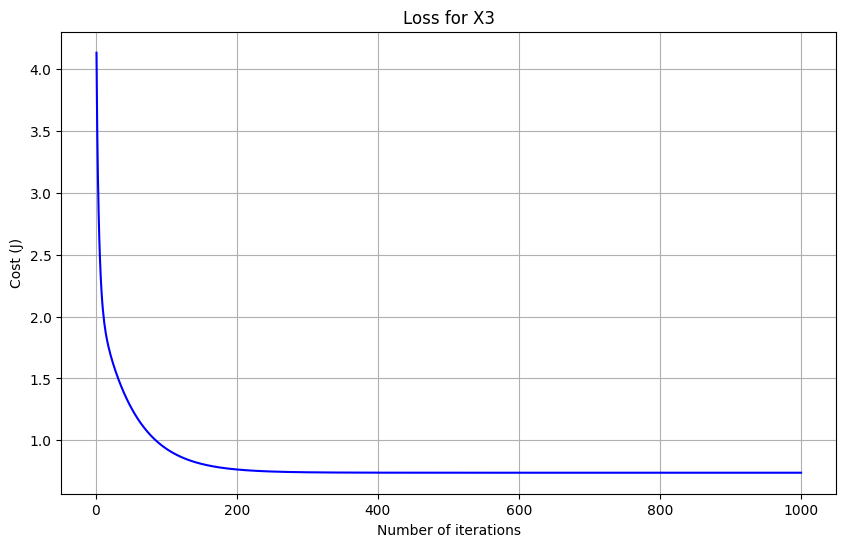

In [94]:
#plotting the loss over iteration graph for
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss for X3')

### 2.2 When we are using a higher learning rate, our loss functions decrease faster and thus we can reach a minimum loss in fewer iterations. However, keep in mind that if we use a very large learning rate, the loss might diverge due to overshooting and never reach the minimum.

2.4 Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3,2, 1)

In [95]:
#predicting our dependant variable for different given explanatory variables
x1, x2, x3 = 1, 1, 1
y1_bar = thetaFinal[0]  + thetaFinal[1] * (x1) + thetaFinal[2] * (x2) + thetaFinal[3] * (x3)

x1, x2, x3 = 2, 0, 4
y2_bar = thetaFinal[0]  + thetaFinal[1] * (x1) + thetaFinal[2] * (x2) + thetaFinal[3] * (x3)
x1, x2, x3 = 3, 2, 1
y3_bar = thetaFinal[0]  + thetaFinal[1] * (x1) + thetaFinal[2] * (x2) + thetaFinal[3] * (x3)

y1_bar, y2_bar, y3_bar

(3.5772828177319926, 0.24429082475948705, 0.10251123321230132)